Overview from Kaggle:

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, you are challenged to **predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system**.

We will perform a binary classification using neural network models in Keras.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
#Keras
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout
 
#Sci-kit Learn
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [3]:
data_train = pd.read_csv('/content/drive/MyDrive/Data/Space_Titanic_train.csv')
data_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
data_test = pd.read_csv('/content/drive/MyDrive/Data/Space_Titanic_test.csv')
data_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


# **Data Exploration**

**PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

**HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.

**CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

**Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

**Destination** - The planet the passenger will be debarking to.

**Age** - The age of the passenger.

**VIP** - Whether the passenger has paid for special VIP service during the voyage.

**RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

**Name** - The first and last names of the passenger.

**Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [5]:
print("The dataset has", data_train.shape[0], "rows and", data_train.shape[1], "columns.")

The dataset has 8693 rows and 14 columns.


In [6]:
# Check for missing values

data_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
data_train.isnull().sum().sort_values()

PassengerId       0
Transported       0
Age             179
RoomService     181
Destination     182
FoodCourt       183
Spa             183
VRDeck          188
Cabin           199
Name            200
HomePlanet      201
VIP             203
ShoppingMall    208
CryoSleep       217
dtype: int64

Every column except passengerID and Transported has some missing data. We can impute missing values in numerical columns with the column mean and missing categorical data can be imputed with the most frequent value in the column. 

In [8]:
# Check class balance for our target variable

data_train['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

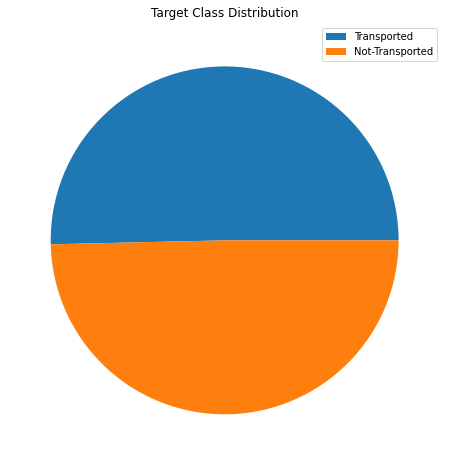

In [9]:
fig, ax = plt.subplots(figsize=(16,8))
ax.pie(x = data_train['Transported'].value_counts())
ax.set_title('Target Class Distribution')
ax.legend(['Transported', 'Not-Transported']);

We have almost a 50/50 ratio of our target variable. Thus, we do not have a balance problem. 

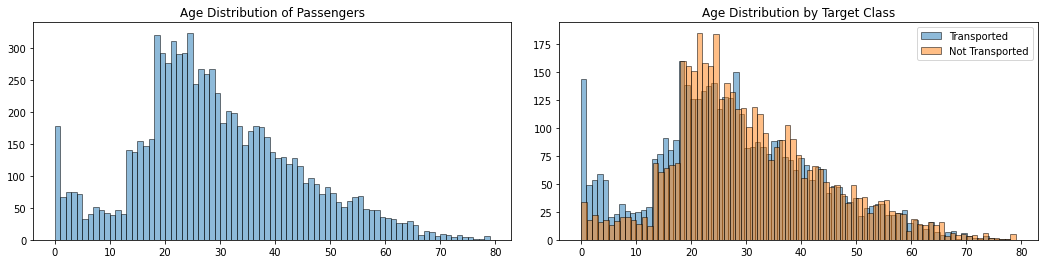

In [10]:
# Let's explore the relationship between our target vector and age distribution

fig, ax = plt.subplots(1, 2, figsize=(18,4))
fig.subplots_adjust(wspace=0.1)
bins = np.int8(data_train['Age'].max())

ax[0].hist(data_train['Age'], bins=bins, edgecolor='k', alpha=0.5);
ax[0].set_title('Age Distribution of Passengers')

ax[1].hist(data_train[data_train['Transported']]['Age'], bins=bins, alpha=0.5, edgecolor='k', label = 'Transported');
ax[1].hist(data_train[~data_train['Transported']]['Age'], bins=bins, alpha=0.5, edgecolor='k', label='Not Transported')
ax[1].set_title('Age Distribution by Target Class')
ax[1].legend();

In [31]:
# Check which age range has the most passengers and most transported passengers
age_list = []
for i in range (0,80,10):
  item = []
  item.append('%d-%d' % (i, i+9))
  item.append(data_train[(data_train["Age"] >= i) & (data_train["Age"] >= i) & (data_train["Age"] < i +10)]["Age"].count())
  item.append(data_train[(data_train["Transported"]) & (data_train["Age"] >= i) & (data_train["Age"] < i + 10)]["Age"].count())
  item.append(data_train[(~data_train["Transported"]) & (data_train["Age"] >= i) & (data_train["Age"] < i+10)]["Age"].count())
  age_list.append(item)

age_list = pd.DataFrame(age_list, columns=["AgeRange", "Count", "Transported", "NotTransported"]).set_index("AgeRange").transpose()
age_list


AgeRange,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79
Count,679,1479,2762,1735,1048,557,208,46
Transported,483,788,1296,796,531,275,99,20
NotTransported,196,691,1466,939,517,282,109,26


Most of the passengers transported were between the ages of 20-30. There were also an alarming number of passengers aged 0-1 who were transported. 

# **Data Preprocessing**

In [11]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Since PassengerID, Cabin, and Name are all unique, we can delete them from the dataset as they wont be helpful for our model. 

In [12]:
del data_train['PassengerId'], data_train['Cabin'], data_train['Name'], data_test['PassengerId'], data_test['Cabin'], data_test['Name']

In [13]:
data_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [14]:
data_test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [15]:
X = data_train.drop(columns='Transported')
y = data_train['Transported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Transform data
scaler = StandardScaler()
encoder = OneHotEncoder()

mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')

cat_feat = make_column_selector(dtype_include='object')
num_feat = make_column_selector(dtype_include='number')

In [17]:
num_processor = make_pipeline(scaler, mean_imputer)
cat_processor = make_pipeline(encoder, freq_imputer)

In [18]:
num_tuple = (num_processor, num_feat)
cat_tuple = (cat_processor, cat_feat)

In [19]:
column_transformer = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')

In [20]:
X_train = column_transformer.fit_transform(X_train)
X_test = column_transformer.transform(X_test)

In [21]:
input_shape = X_train.shape[1]
input_shape

20

In [22]:
# Learning history plotting function
def plot_history(history):
  """Takes a keras model learning history and plots each metric"""
  
  metrics = history.history.keys()
  
  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()

In [23]:
# Create model architecture

input_dim = X_train.shape[1]

model = Sequential()

model.add(Dense(20, input_dim=input_dim, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.compile(loss='bce', optimizer='adam', metrics=['accuracy',
                                                     metrics.Precision(),
                                                     metrics.Recall()])

In [25]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100, verbose= 0)

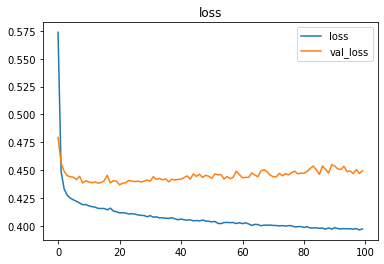

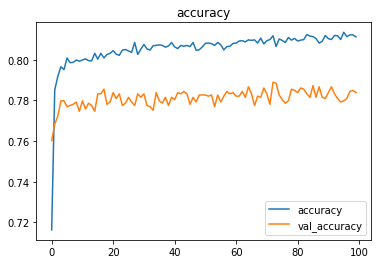

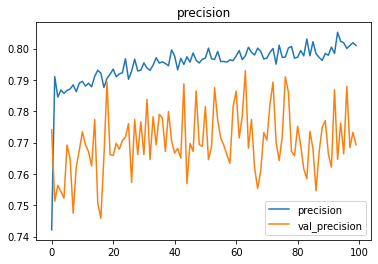

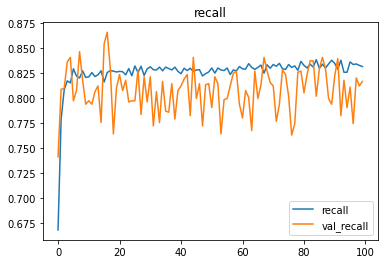

In [26]:
plot_history(history)

**Model Evaluation**

              precision    recall  f1-score   support

       False       0.80      0.75      0.77       861
        True       0.77      0.82      0.79       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



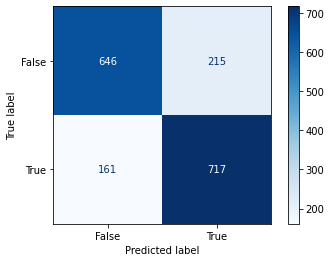

In [27]:
y_preds = model.predict(X_test)
y_preds = np.round(y_preds)
print(classification_report(y_test, y_preds))
ConfusionMatrixDisplay.from_predictions(y_test, y_preds, cmap='Blues');

Our model predicts passenger loss with an accuracy of around 80%. 